In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
import geopandas as gpd
pd.set_option('display.max_rows', 100)

In [2]:
calender1=pd.read_csv('calendar2.csv')
# data1=pd.read_csv('listings.csv')
# data2=pd.read_csv('listings2.csv')
data4=pd.read_csv('reviews.csv')
data5=pd.read_csv('reviews2.csv')
data6=pd.read_csv('neighbourhoods.csv')

In [3]:
data5.head()

,listing_id,id,date,reviewer_id,reviewer_name,comments
0,49091,8243238,2013-10-21,8557223,Jared,Fran was absolutely gracious and welcoming. Ma...
1,50646,11909864,2014-04-18,1356099,James,A comfortable room in a smart condo developmen...
2,50646,13823948,2014-06-05,15222393,Welli,Stayed over at Sujatha's house for 3 good nigh...
3,50646,15117222,2014-07-02,5543172,Cyril,It's been a lovely stay at Sujatha's. The room...
4,50646,15426462,2014-07-08,817532,Jake,"We had a great experience. A nice place, an am..."


In [4]:
df_text=data5[['listing_id','comments']]

In [5]:
df_text

,listing_id,comments
0,49091,Fran was absolutely gracious and welcoming. Ma...
1,50646,A comfortable room in a smart condo developmen...
2,50646,Stayed over at Sujatha's house for 3 good nigh...
3,50646,It's been a lovely stay at Sujatha's. The room...
4,50646,"We had a great experience. A nice place, an am..."
5,50646,Quiet condo. Comfortable stay and good location.
6,50646,Nice room and friendly stay. Kindely and smili...
7,50646,"Suja and her husband are really nice, amazing,..."
8,50646,Sujatha is a wonderful host and gives us a lot...
9,50646,A wonderful experience & highly recommended! S...


In [6]:
import string
from nltk.corpus import stopwords
from nltk.stem import SnowballStemmer
import re

In [7]:
stop=stopwords.words('english')
stemmer = SnowballStemmer('english')

In [8]:
def text_process(mess):
    """
    Takes in a string of text, then performs the following:
    1. Remove all punctuation
    2. Remove all stopwords
    3. Returns a list of the cleaned text
    """
    #make it as str
    mess=str(mess)
    
    #only alphabet
    replaced = re.sub("[^a-zA-Z]", " ", mess)
    
    # Check characters to see if they are in punctuation
    nopunc = [char for char in replaced if char not in string.punctuation]

    # Join the characters again to form the string.
    nopunc = ''.join(nopunc)
    
    #lowercase
    nopunc=nopunc.lower()
    
    #remove stopwords
    nopunc=[word for word in nopunc.split() if word.lower() not in stop]
    
    #make it based on stem
#     nopunc=[(stemmer.stem(w)) for w in nopunc]
    
    nopunc=' '.join(nopunc)
    return nopunc
## apakah perlu remove geographical words?

In [9]:
stemmer.stem('running')

'run'

In [10]:
df_text['comments_clean']=df_text['comments'].apply(text_process)

C:\Anaconda\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


In [11]:
df_text=df_text[['listing_id','comments_clean']]

In [12]:
df_text

,listing_id,comments_clean
0,49091,fran absolutely gracious welcoming made stay g...
1,50646,comfortable room smart condo development every...
2,50646,stayed sujatha house good nights boyfriend suj...
3,50646,lovely stay sujatha room clean location perfec...
4,50646,great experience nice place amazing complex ea...
5,50646,quiet condo comfortable stay good location
6,50646,nice room friendly stay kindely smiling family
7,50646,suja husband really nice amazing caring people...
8,50646,sujatha wonderful host gives us lot help bedro...
9,50646,wonderful experience highly recommended sujath...


In [13]:
from textblob import TextBlob

In [14]:
def polarity(col):
    blob=TextBlob(col)
    return blob.sentiment.polarity
    

In [15]:
df_text['blob sentiment']=df_text['comments_clean'].apply(polarity)

In [22]:
df_text.head()

,listing_id,comments_clean,blob sentiment
0,49091,fran absolutely gracious welcoming made stay g...,0.210000
1,50646,comfortable room smart condo development every...,0.431190
2,50646,stayed sujatha house good nights boyfriend suj...,0.520278
3,50646,lovely stay sujatha room clean location perfec...,0.591667
4,50646,great experience nice place amazing complex ea...,0.355556


In [75]:
df_text['listing_id'].nunique()

5040

In [24]:
df_text.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 102091 entries, 0 to 102090
Data columns (total 3 columns):
listing_id        102091 non-null int64
comments_clean    102091 non-null object
blob sentiment    102091 non-null float64
dtypes: float64(1), int64(1), object(1)
memory usage: 2.3+ MB


In [56]:
id_sentiment=[]
for item in df_text['listing_id'].unique():
    temp=[]
    for sentiment in df_text[df_text['listing_id']==item]['blob sentiment']:
        temp.append(sentiment)
    id_sentiment.append((item,temp))
    

In [58]:
id_sentiment=np.array(id_sentiment)

In [59]:
col_id=id_sentiment[:,0]

In [60]:
col_sentiment=id_sentiment[:,1]

In [78]:
df_sentiment=pd.DataFrame({'id':col_id,'sentiment':col_sentiment})

In [79]:
df_sentiment['mean']=df_sentiment['sentiment'].apply(lambda x:sum(x)/len(x))

In [80]:
df_sentiment[df_sentiment['mean']<0].count()

id           61
sentiment    61
mean         61
dtype: int64

In [84]:
df_sentiment.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5040 entries, 0 to 5039
Data columns (total 3 columns):
id           5040 non-null object
sentiment    5040 non-null object
mean         5040 non-null float64
dtypes: float64(1), object(2)
memory usage: 118.2+ KB


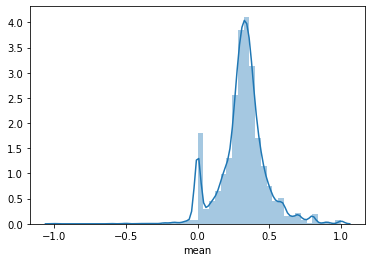

In [85]:
sns.distplot(df_sentiment['mean'])

## Export CSV

In [86]:
df_sentiment.to_csv("sentiment.csv")